In [ ]:
import pandas as pd

df_abev = pd.read_csv('/content/RESULTADOS_ABEV3_V2.csv').drop(['Unnamed: 0'], axis=1)
df_b3sa3 = pd.read_csv('/content/RESULTADOS_B3SA3_V2.csv').drop(['Unnamed: 0'], axis=1)
df_bbdc4 = pd.read_csv('/content/RESULTADOS_BBDC4_V2.csv').drop(['Unnamed: 0'], axis=1)
df_elet3 = pd.read_csv('/content/RESULTADOS_ELET3_V2.csv').drop(['Unnamed: 0'], axis=1)
df_itub4 = pd.read_csv('/content/RESULTADOS_ITUB4_V2.csv').drop(['Unnamed: 0'], axis=1)
df_petr4 = pd.read_csv('/content/RESULTADOS_PETR4_V2.csv').drop(['Unnamed: 0'], axis=1)
df_vale3 = pd.read_csv('/content/RESULTADOS_VALE3_V2.csv').drop(['Unnamed: 0'], axis=1)

df_abev = df_abev.add_suffix('_abev')
df_b3sa3 = df_b3sa3.add_suffix('_b3sa3')
df_bbdc4 = df_bbdc4.add_suffix('_bbdc4')
df_elet3 = df_elet3.add_suffix('_elet3')
df_itub4 = df_itub4.add_suffix('_itub4')
df_petr4 = df_petr4.add_suffix('_petr4')
df_vale3 = df_vale3.add_suffix('_vale3')

df = pd.concat([df_abev, df_b3sa3, df_bbdc4, df_elet3, df_itub4, df_petr4, df_vale3], axis=1)

In [ ]:
df

,real_abev,predicted_abev,real_b3sa3,predicted_b3sa3,real_bbdc4,predicted_bbdc4,real_elet3,predicted_elet3,real_itub4,predicted_itub4,real_petr4,predicted_petr4,real_vale3,predicted_vale3
0,15.39,15.573434,12.19,12.645290,19.450001,19.557837,46.040001,46.656796,26.480000,26.533928,32.430000,34.081635,64.970001,70.018814
1,15.27,15.348527,11.85,12.473987,18.959999,19.603548,46.110001,45.997290,25.809999,26.523030,33.230000,32.243100,64.500000,68.016014
2,15.43,15.202462,12.10,12.277445,19.120001,19.167768,46.810001,46.305350,26.190001,25.808030,33.849998,33.068066,63.889999,68.037224
3,15.48,15.345239,12.64,12.452305,19.309999,19.269627,46.509998,46.788033,26.549999,26.033691,33.419998,33.489360,62.919998,66.590256
4,15.56,15.398378,12.39,13.061571,19.230000,19.484756,45.160000,46.528200,26.730000,26.607815,32.099998,33.195860,63.669998,65.300970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,13.87,13.749890,12.91,13.177964,14.650000,15.698583,35.150002,34.363632,27.450001,26.757679,33.369999,33.028236,67.669998,64.498870
248,13.71,13.841489,13.16,13.405068,14.830000,15.863612,35.880001,35.047455,27.610001,27.301529,33.529999,33.075447,67.620003,65.666080
249,13.64,13.684260,13.21,13.608348,14.890000,15.860083,36.450001,35.491764,27.750000,27.541796,33.029999,33.254360,67.360001,65.589516
250,13.53,13.550072,13.30,13.730854,14.950000,15.909276,36.560001,36.165780,27.639999,27.754030,33.869999,32.767730,70.120003,64.914955


In [ ]:
import numpy as np
import pandas as pd
import warnings

np.random.seed(73)

warnings.filterwarnings("ignore")

valor = 100

valores = [100]

lista_qtd = [0, 0, 0, 0, 0, 0, 0]

for i in range(1, len(df)-1, 5):

  df2 = df.copy().loc[i-1:i, :]

  predicted_columns = [col for col in df2.columns if col.startswith('predicted_')]
  real_columns = [col for col in df2.columns if col.startswith('real_')]

  returns = df2[predicted_columns].pct_change().dropna()
  returns = returns.applymap(lambda x: max(0, x))

  num_simulations = 1000

  results = []

  for _ in range(num_simulations):

      allocations = np.random.random(len(predicted_columns))
      allocations /= allocations.sum()

      expected_return = np.sum(returns.mean() * allocations)

      expected_volatility = np.sqrt(np.dot(allocations.T, np.dot(returns.cov(), allocations)))

      sharpe_ratio = expected_return / expected_volatility

      results.append([expected_return, expected_volatility, sharpe_ratio, allocations])

  columns = ['Return', 'Volatility', 'Sharpe Ratio', 'Alocations']
  results_df = pd.DataFrame(results, columns=columns)

  max_sharpe_portfolio = results_df.iloc[results_df['Return'].idxmax()]

  for j in range(0, 7):

    lista_qtd[j] = (valor*max_sharpe_portfolio['Alocations'][j])/df[real_columns[j]].iloc[i]

  valor = 0
  for h in range(0, 7):
    valor += lista_qtd[h] * (df[real_columns[h]].iloc[i+1])

  print(valor)

  valores.append(valor)

print(40*"=")
valor

100.98965777753558
102.5253060395882
105.65337057627531
103.95761391719941
110.7697729636598
110.8782919184661
111.92315848578679
110.13423715705137
109.9891001121545
107.22986496774442
107.37705765516615
107.62220908669104
106.41497830980495
106.80962132860415
106.10675078286312
109.60628298440506
110.97569315757929
114.21301005089268
116.50767159437613
116.52073515879519
116.46871578877057
114.46087920116082
115.54552402696208
115.30367370893521
119.07821798464505
118.704201118571
118.55434528674434
121.04728474939131
122.317698221527
124.17817977764203
122.32377446426662
123.58771917531266
124.99316350121639
124.61572944075814
124.96612331022183
125.6191760405346
126.5162043887892
122.89037856360706
124.30481271099717
124.26698279536734
122.51982940439103
124.87309836221897
125.25230884652859
121.83176531639117
119.74152395701587
120.1315210622012
120.21295232161181
117.33732752011176
116.23920041545598
117.67646014741153


117.67646014741153

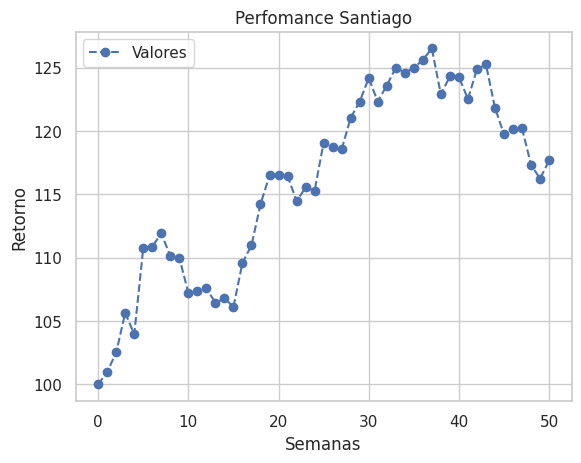

In [ ]:
import matplotlib.pyplot as plt

plt.plot(valores, marker='o', linestyle='--', color='b', label='Valores')

plt.title('Perfomance Santiago')
plt.xlabel('Semanas')
plt.ylabel('Retorno')

plt.legend()

plt.show()

In [ ]:
returns = [item for item in valores for i in range(5)]

In [ ]:
rng = pd.date_range(start='1/1/2022', end='9/15/2023', freq='B')

rng = rng[-255:]

df5 = pd.DataFrame({'Date': rng,'returns': returns})

df5['Date'] = pd.to_datetime(df5['Date'])

df5.set_index('Date', inplace=True)

In [ ]:
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt

pf.create_full_tear_sheet(df5['returns'].pct_change())

plt.show()

Start date,2022-09-26
End date,2023-09-15
Total months,12
,Backtest
Annual return,17.5%
Cumulative returns,17.7%
Annual volatility,12.5%
Sharpe ratio,1.36
Calmar ratio,2.15
Stability,0.70
Max drawdown,-8.1%


AttributeError: ignored